In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import itertools

<module 'matplotlib.pyplot' from 'c:\\Users\\ruchi\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

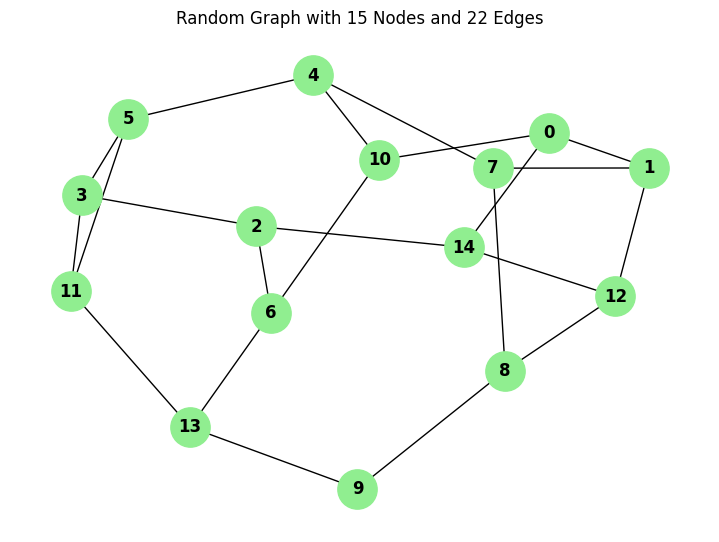

In [ ]:
def generate_random_graph_fast():
    num_nodes = random.randint(5, 25)

    G = nx.G_sample_sampleraph()
    G.add_nodes_from(range(num_nodes))

    possible_edges = list(itertools.combinations(range(num_nodes), 2))
    random.shuffle(possible_edges)

    degrees = {i: 0 for i in range(num_nodes)}

    for u, v in possible_edges:
        if degrees[u] < 3 and degrees[v] < 3:
            G.add_edge(u, v)
            degrees[u] += 1
            degrees[v] += 1

        if all(d >= 3 for d in degrees.values()):
            break

    return G

G = generate_random_graph_fast()

plt.figure(figsize=(7, 5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=800, font_weight='bold')
plt.title(f"Random Graph with {len(G.nodes())} Nodes and {len(G.edges())} Edges")
plt


In [3]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Create an unweighted, undirected graph
# G = nx.Graph()

# # Add nodes and edges
# G.add_edges_from([
#     ('A', 'B'),
#     ('A', 'C'),
#     ('B', 'D'),
#     ('C', 'D'),
#     ('C', 'E'),
#     ('E', 'F')
# ])

# # Visualize the graph
# plt.figure(figsize=(6, 4))
# nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
# plt.title("Unweighted Undirected Graph")
# plt.show()


Initial Graph:


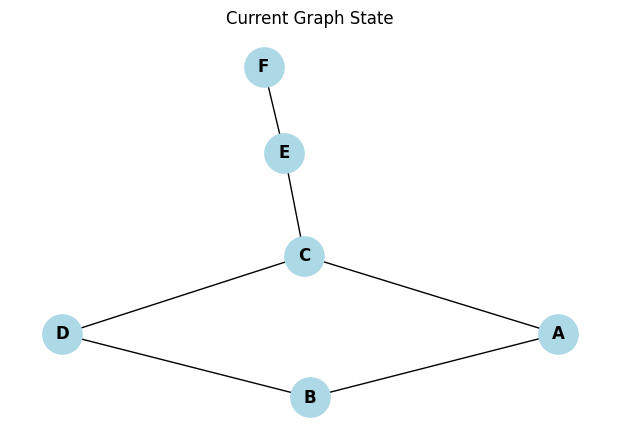


Player 1's turn.
Available nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Removed node: C


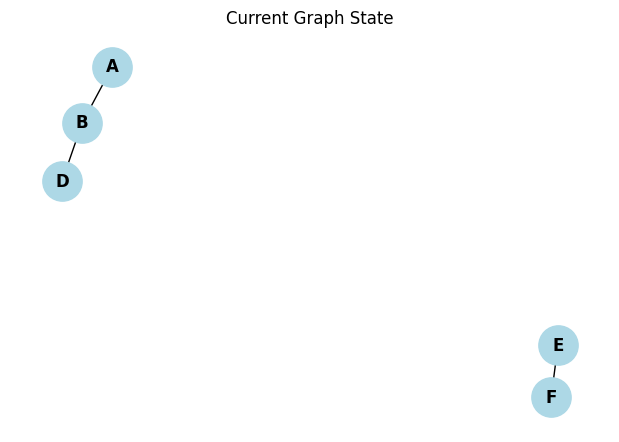


Player 2's turn.
Available nodes: ['A', 'B', 'D', 'E', 'F']
Invalid node. Try again.

Player 2's turn.
Available nodes: ['A', 'B', 'D', 'E', 'F']
Invalid node. Try again.

Player 2's turn.
Available nodes: ['A', 'B', 'D', 'E', 'F']
Removed node: D


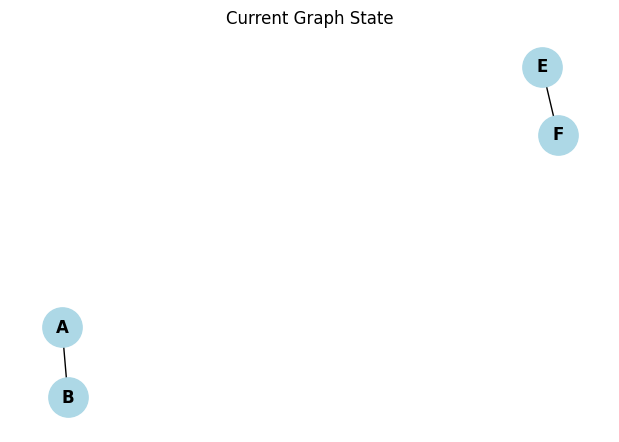


Player 1's turn.
Available nodes: ['A', 'B', 'E', 'F']
Removed node: A


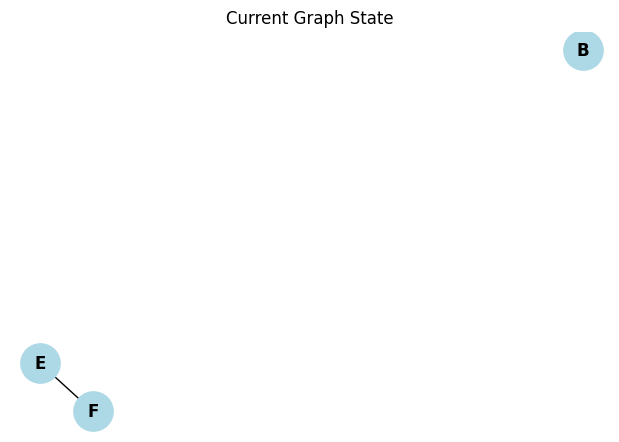


Player 2's turn.
Available nodes: ['B', 'E', 'F']
Removed node: F


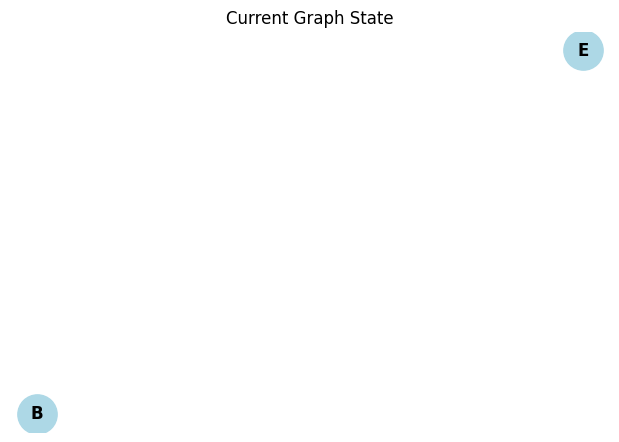


Player 1's turn.
Available nodes: ['B', 'E']
Removed node: E


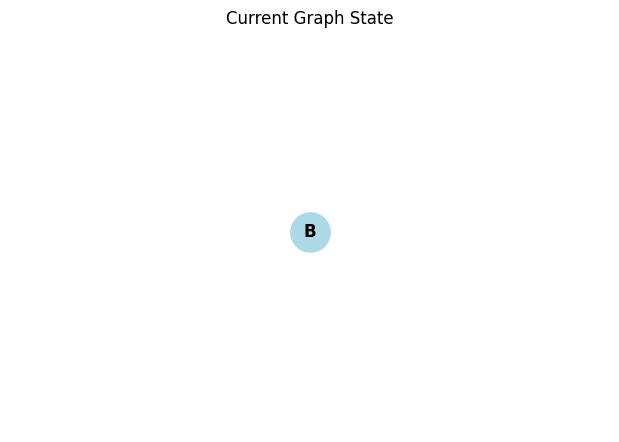


Player 2's turn.
Available nodes: ['B']
Removed node: B

Player 2 removed the last node and wins!


In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Create Graph ---
G = nx.Graph()
G.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('C', 'D'),
    ('C', 'E'),
    ('E', 'F')
])

def draw_graph(G):
    plt.figure(figsize=(6, 4))
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
    plt.title("Current Graph State")
    plt.show()

def remove_node(G, node):
    if node in G.nodes:
        G.remove_node(node)
        print(f"Removed node: {node}")
    else:
        print("Invalid move. Node does not exist.")

# --- Game Loop ---
players = ["Player 1", "Player 2"]
turn = 0

print("Initial Graph:")
draw_graph(G)

while len(G.nodes) > 0:
    current_player = players[turn % 2]
    print(f"\n{current_player}'s turn.")
    print("Available nodes:", list(G.nodes))

    node = input("Enter a node to remove: ").strip()
    if node not in G.nodes:
        print("Invalid node. Try again.")
        continue
    remove_node(G, node)

    if len(G.nodes) == 0:
        print(f"\n{current_player} removed the last node and wins!")
        break

    draw_graph(G)
    turn += 1


In [ ]:
def remove_node_and_neighbors(G, node_to_remove):
    """
    Removes a node and all its adjacent nodes from the graph G, and visualizes the result.

    Args:
        G: A NetworkX graph.
        node_to_remove: The node to remove.
    """
    if node_to_remove in G.nodes:
        neighbors_to_remove = list(G.neighbors(node_to_remove))
        G.remove_node(node_to_remove)
        print(f"Removed node: {node_to_remove}")
        for neighbor in neighbors_to_remove:
            if neighbor in G.nodes: 
                G.remove_node(neighbor)
                print(f"Removed adjacent node: {neighbor}")
        draw_graph(G)
    else:
        print(f"Node '{node_to_remove}' not found in the graph.")

# Example usage (assuming G and draw_graph are defined):
# G_copy = G.copy() # Create a copy to avoid modifying the original graph if you want to keep it
# remove_node_and_neighbors(G_copy, 'A')



Initial Sample Graph:


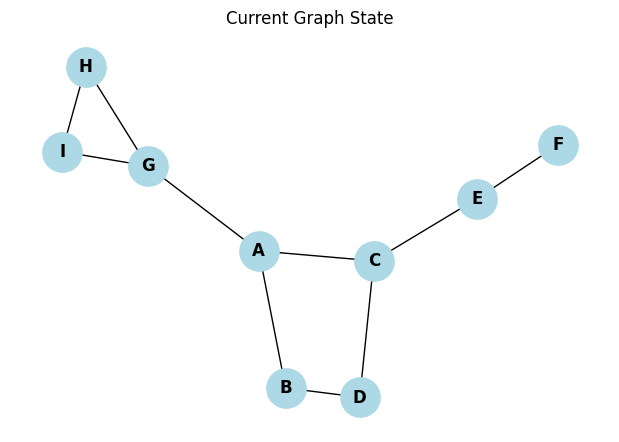

Removed node: A
Removed adjacent node: B
Removed adjacent node: C
Removed adjacent node: G


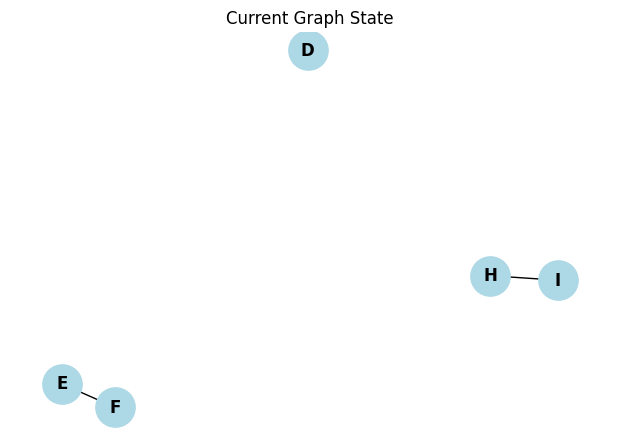


Sample Graph after removing node 'A' and its neighbors:


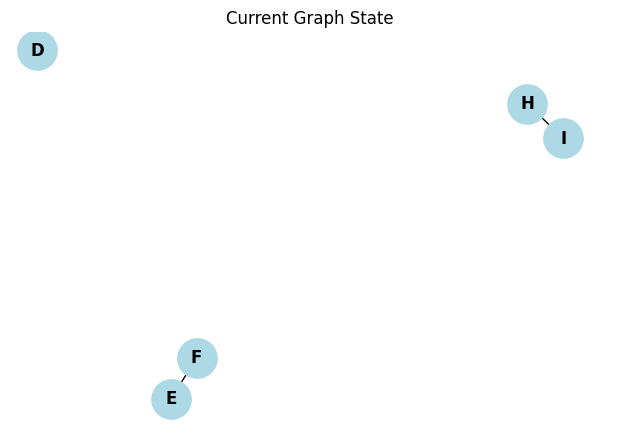

In [11]:
# Create a sample graph
G_sample = nx.Graph()
G_sample.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('B', 'D'),
    ('C', 'D'), ('C', 'E'), ('E', 'F'),
    ('G', 'H'), ('H', 'I'), ('I', 'G'),
    ('A', 'G')
])

print("Initial Sample Graph:")
draw_graph(G_sample)

# Create a copy for demonstration
G_modified_neighbors = G_sample.copy()

# Choose a node to remove along with its neighbors
node_to_remove_with_neighbors = 'A'
remove_node_and_neighbors(G_modified_neighbors, node_to_remove_with_neighbors)

print(f"\nSample Graph after removing node '{node_to_remove_with_neighbors}' and its neighbors:")
# Use the existing draw_graph function to visualize the modified graph
draw_graph(G_modified_neighbors)

Initial Graph:


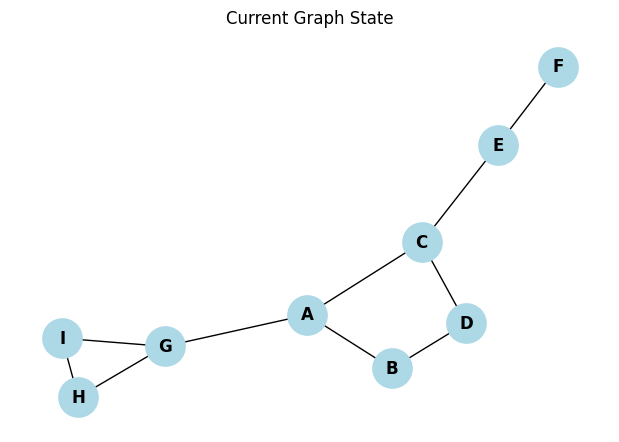


Player 1's turn.
Available nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
Removed node: G
Removed adjacent node: H
Removed adjacent node: I
Removed adjacent node: A


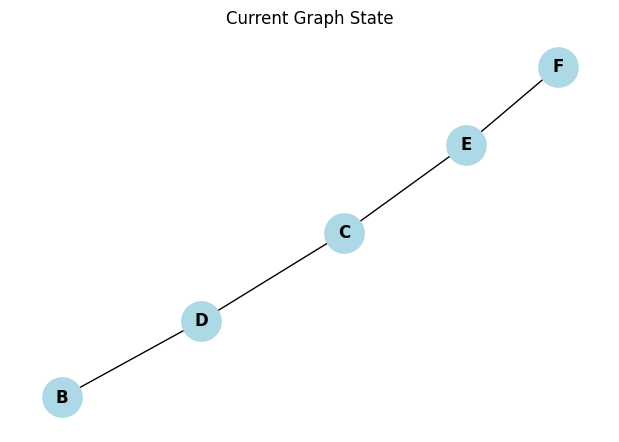

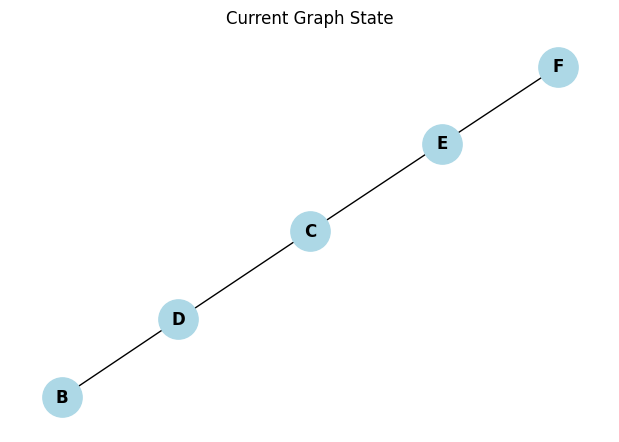


Player 2's turn.
Available nodes: ['B', 'C', 'D', 'E', 'F']
Removed node: C
Removed adjacent node: D
Removed adjacent node: E


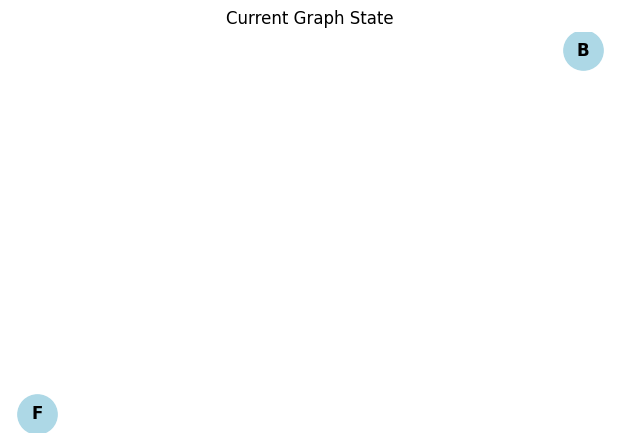

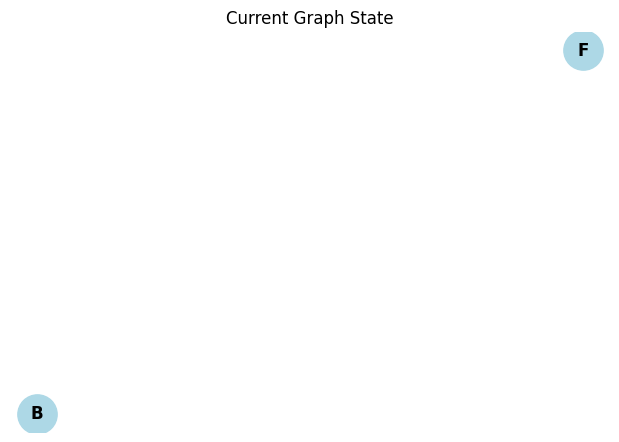


Player 1's turn.
Available nodes: ['B', 'F']
Removed node: F


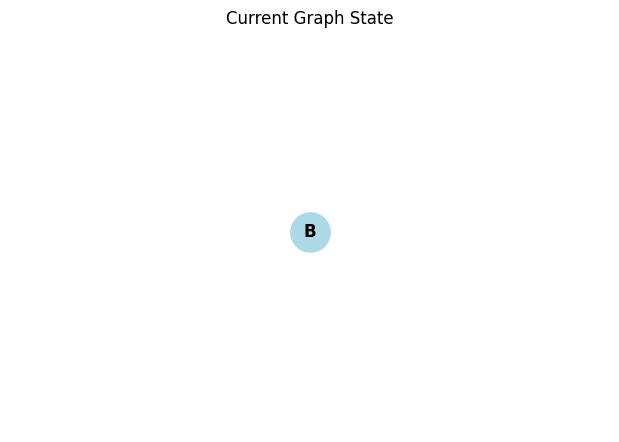

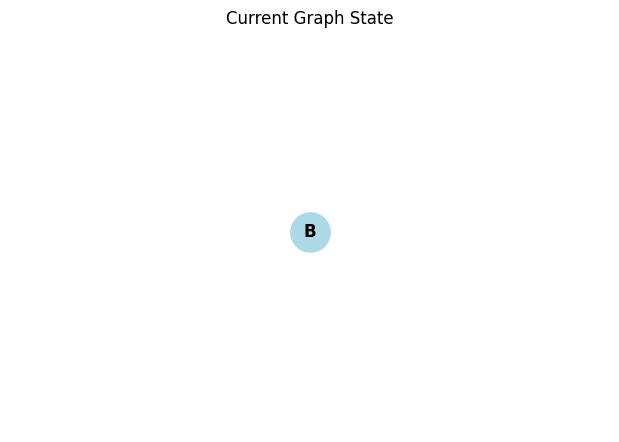


Player 2's turn.
Available nodes: ['B']
Removed node: B


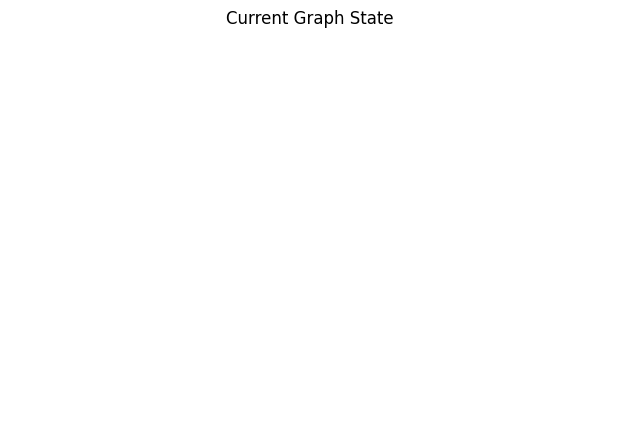


Player 2 removed the last node and wins!


In [14]:
# --- Game Loop ---
players = ["Player 1", "Player 2"]
turn = 0

print("Initial Graph:")
draw_graph(G_sample)

while len(G_sample.nodes) > 0:
    current_player = players[turn % 2]
    print(f"\n{current_player}'s turn.")
    print("Available nodes:", list(G_sample.nodes))

    node = input("Enter a node to remove: ").strip()
    if node not in G_sample.nodes:
        print("Invalid node. Try again.")
        continue
    remove_node_and_neighbors(G_sample, node)

    if len(G_sample.nodes) == 0:
        print(f"\n{current_player} removed the last node and wins!")
        break

    draw_graph(G_sample)
    turn += 1
